In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation

from darkmod import laue

In [32]:
# Instantiate a cubic AL crystal (space group 225)
unit_cell = [4.0493, 4.0493, 4.0493, 90.0, 90.0, 90.0]
U = Rotation.random().as_matrix()
B = laue.get_b_matrix(unit_cell)
UB = U @ B
hkl = np.array([1, -1, 1])
Q_0 = UB @ hkl  # 1/ang


In [59]:
relerr = []
for i in range(1000):
    mag = 1e-4  # rad
    rvec = np.random.normal(size=(3,), scale=mag)
    rvec = rvec / np.linalg.norm(rvec)
    dU = Rotation.from_rotvec(mag * rvec).as_matrix()
    Q = dU @ Q_0  # 1/ang
    beam_width = 500  # nm
    dx = beam_width / 2
    # Q_0 + c * dx**2 = Q => c * dx**2 = Q - Q_0 => c = (Q - Q_0) / dx**2
    c = (Q - Q_0) / dx**2
    e = c * beam_width**2
    e = 4 * (Q - Q_0)
    relerr.append(np.abs(e / Q_0))
relerr = np.array(relerr)

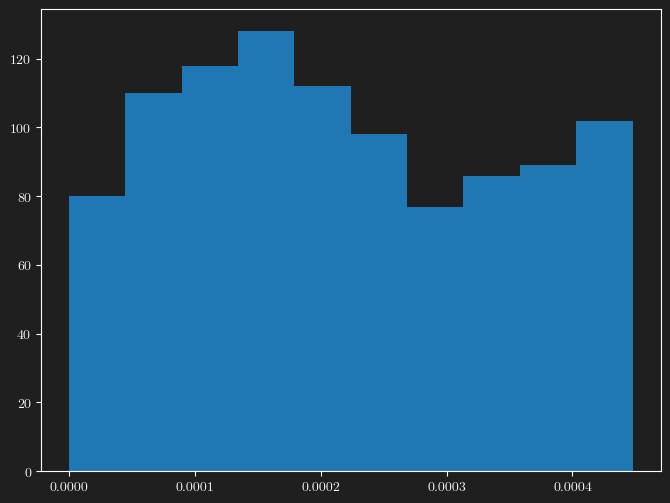

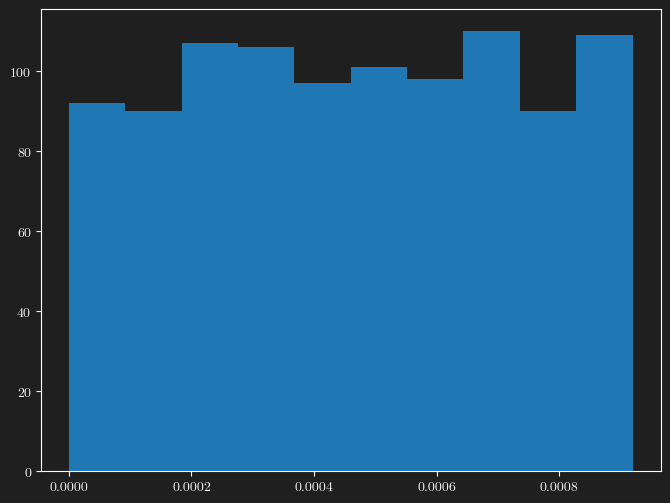

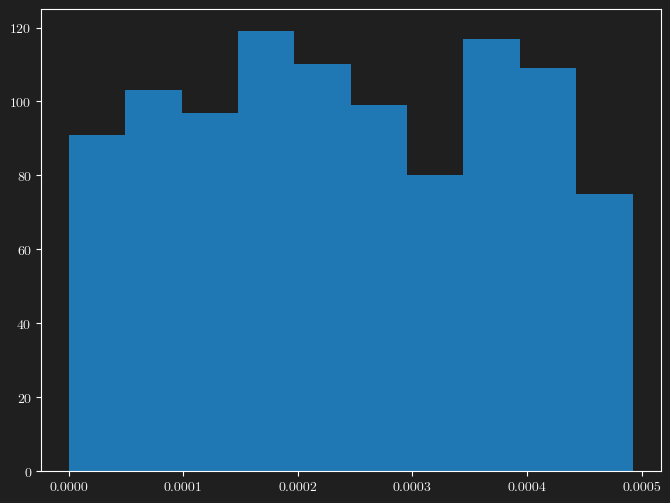

In [60]:
for i in range(3):
    plt.figure(figsize=(8, 6))
    plt.hist(relerr[:, i])
    plt.show()

In [77]:
import sympy as sp

# Define symbols
s = sp.symbols("s")
sigma = sp.symbols("sigma", real=True, positive=True)
d = sp.symbols("d")
n_hat = sp.symbols("n_hat")

n_z = sp.symbols("n_z", real=True)  # d*n_hat

# Define the expression
numerator = s * s * n_z * n_z
exponent = -numerator / (2 * sigma**2)
integrand = s * s * sp.exp(exponent)


# Perform the integral
result = sp.integrate(integrand, (s, -sp.oo, sp.oo)).simplify()

display(result)

Piecewise((sqrt(2)*sqrt(pi)*sigma**3/n_z**3, Abs(arg(n_z)) < pi/4), (Integral(s**2*exp(-n_z**2*s**2/(2*sigma**2)), (s, -oo, oo)), True))

In [92]:
theta = sp.symbols("theta", real=True)
s, c = sp.sin(-2 * theta), sp.cos(-2 * theta)
Ry = sp.Matrix([[c, 0, s], [0, 1, 0], [-s, 0, c]])
eta = sp.symbols("eta", real=True)
s, c = sp.sin(eta), sp.cos(eta)
Rx = sp.Matrix([[1, 0, 0], [0, c, -s], [0, s, c]])

nhat = Rx @ Ry @ sp.Matrix([1, 0, 0])
n_z = nhat[2]

# Define symbols
s = sp.symbols("s")
sigma = sp.symbols("sigma", real=True, positive=True)

# Define the expression
numerator = s * s * n_z * n_z
exponent = -numerator / (2 * sigma**2)
integrand = s * s * sp.exp(exponent)


# Perform the integral
result = sp.integrate(integrand, (s, -sp.oo, sp.oo)).simplify()
result


Piecewise((sqrt(2)*sqrt(pi)*sigma**3/(sin(2*theta)**2*cos(eta)**2*Abs(sin(2*theta)*cos(eta))), Abs(arg(sin(2*theta)**2) + arg(cos(eta)**2)) < pi/2), (Integral(s**2*exp(-s**2*sin(2*theta)**2*cos(eta)**2/(2*sigma**2)), (s, -oo, oo)), True))

In [93]:
# Define the expression
numerator = s * s * n_z * n_z
exponent = -numerator / (2 * sigma**2)
integrand = sp.exp(exponent)


# Perform the integral
result = sp.integrate(integrand, (s, -sp.oo, sp.oo)).simplify()
result


Piecewise((sqrt(2)*sqrt(pi)*sigma*Abs(sin(2*theta)*cos(eta))/(sin(2*theta)**2*cos(eta)**2), Abs(arg(sin(2*theta)**2) + arg(cos(eta)**2)) <= pi/2), (Integral(exp(-s**2*sin(2*theta)**2*cos(eta)**2/(2*sigma**2)), (s, -oo, oo)), True))